<a href="https://colab.research.google.com/github/Gagandeep999/AI_Climate_Crisis_2020/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install geopandas
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
from statistics import mean
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.preprocessing import StandardScaler
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 2020

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


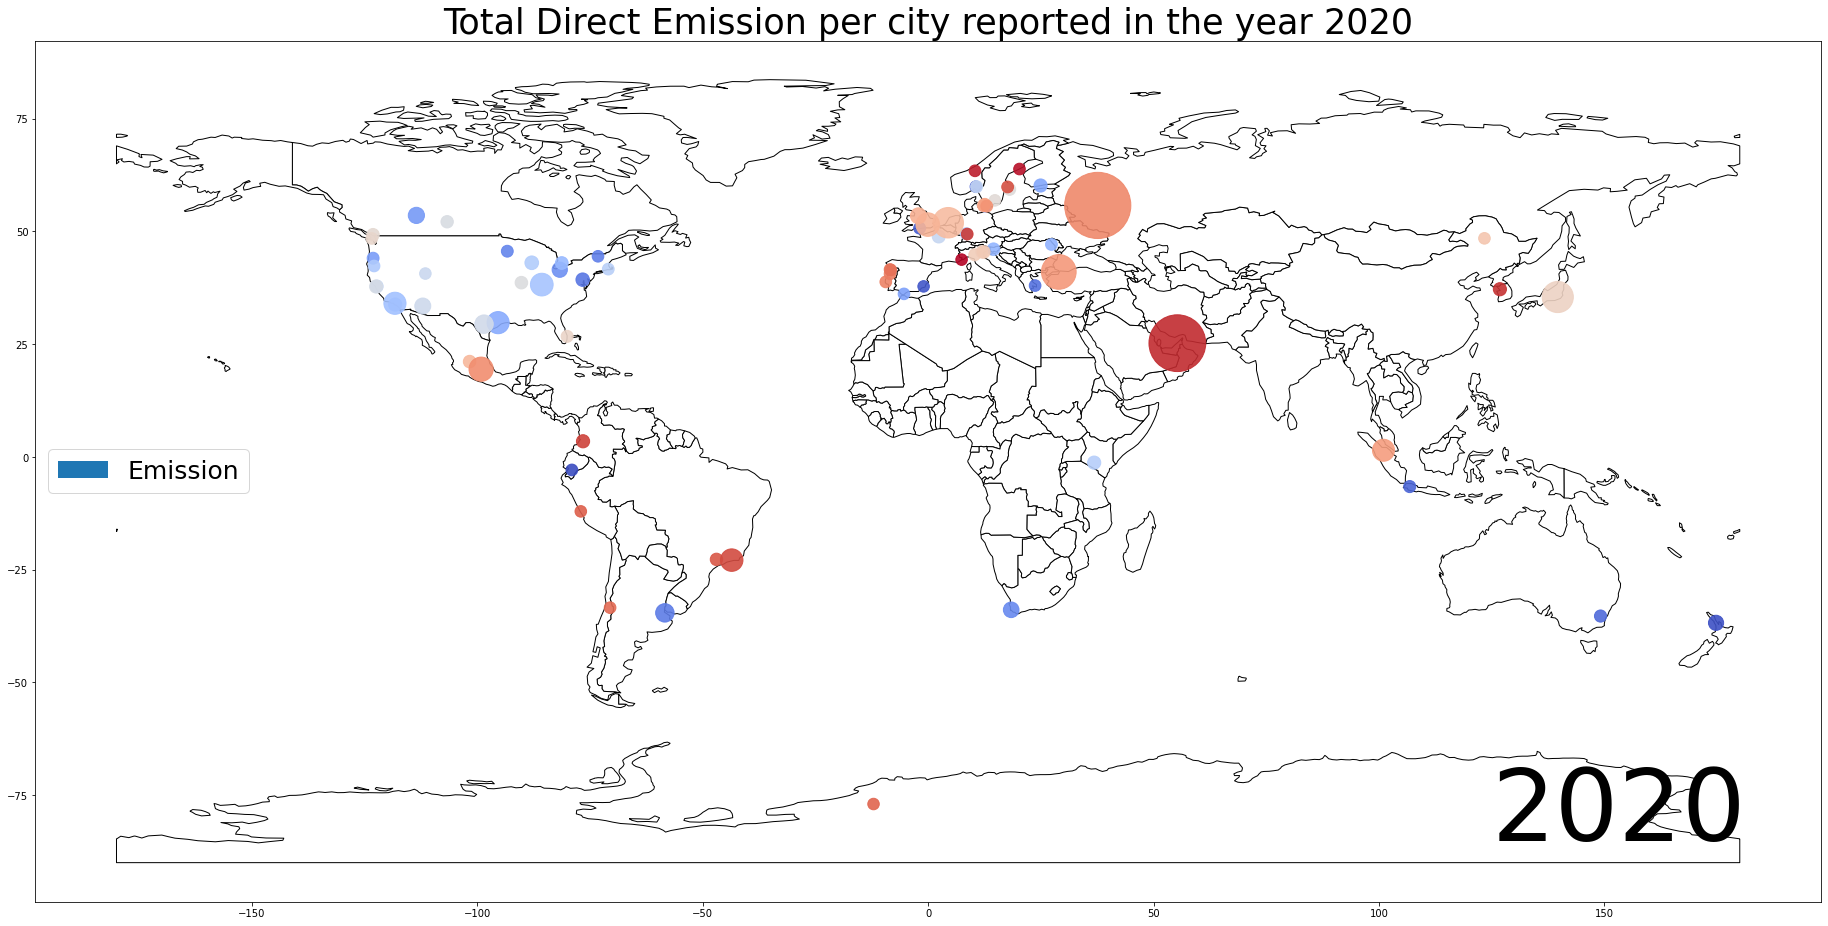

In [ ]:
df_2020 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2020", header=0, skipfooter=7)

df_2020['EMM'] = 0.0
for index,row in df_2020.iterrows():
    total = row['Direct emissions (metric tonnes CO2e) for Total generation of grid-supplied energy'] + \
            row['Direct emissions (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy)']
    df_2020['EMM'][index] = total

    if pd.isna(row['Accounting year'])==False:
      acyear = row['Accounting year']
      year = acyear[:4]
      df_2020['Accounting year'][index] = year
df_2020 = df_2020[['City', 'Country', 'CDP Region', 'Accounting year', 'Land area (in square km)', 'Population', 'City Location', 'EMM']]
df_2020 = df_2020.dropna()

df_2020['City Location'] = df_2020['City Location'].apply(wkt.loads)
df_2020_gdf = gpd.GeoDataFrame(df_2020, geometry='City Location')

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

emm_norm = sc_emission.fit_transform(df_2020['EMM'].to_numpy().reshape(-1, 1))
df_2020['EMM_NORM'] = emm_norm
s_exp_emm = pd.Series([200*2**n for n in df_2020['EMM_NORM']])

emm_plot = df_2020_gdf.plot(ax=ax, markersize=s_exp_emm, cmap='coolwarm', label='Emission', marker='o', alpha=0.9) #cmap='coolwarm'
emm_patch = mpatches.Patch(label='Emission')

plt.text(125, -85, '2020', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2020', fontdict = {'fontsize' : 35})
plt.legend(handles=[emm_patch], prop={'size': 25}, loc = 6)
plt.savefig('emission_2020.jpg', format='jpg', dpi=400)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


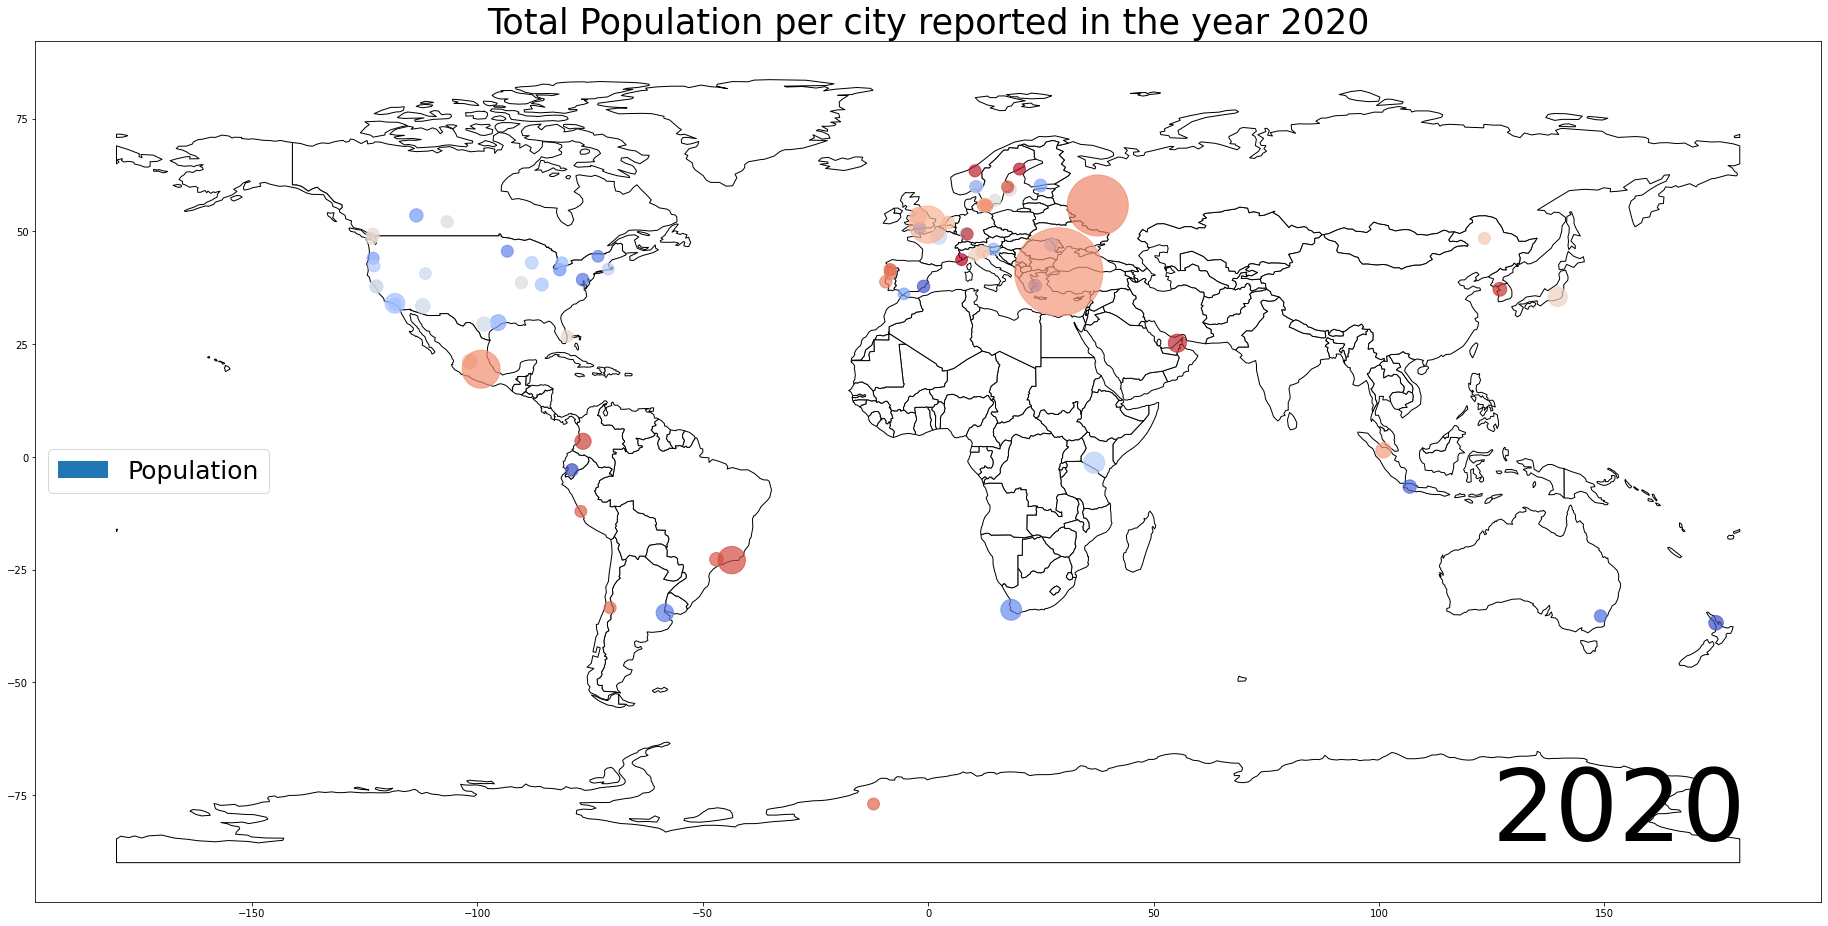

In [ ]:
df_2020 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2020", header=0, skipfooter=7)

df_2020['EMM'] = 0.0
for index,row in df_2020.iterrows():
    total = row['Direct emissions (metric tonnes CO2e) for Total generation of grid-supplied energy'] + \
            row['Direct emissions (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy)']
    df_2020['EMM'][index] = total

    if pd.isna(row['Accounting year'])==False:
      acyear = row['Accounting year']
      year = acyear[:4]
      df_2020['Accounting year'][index] = year
df_2020 = df_2020[['City', 'Country', 'CDP Region', 'Accounting year', 'Land area (in square km)', 'Population', 'City Location', 'EMM']]
df_2020 = df_2020.dropna()

df_2020['City Location'] = df_2020['City Location'].apply(wkt.loads)
df_2020_gdf = gpd.GeoDataFrame(df_2020, geometry='City Location')

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

population_norm = sc_population.fit_transform(df_2020['Population'].to_numpy().reshape(-1,1))
df_2020['Population'] = population_norm
s_exp_pop = pd.Series([200*2**n for n in df_2020['Population']])

pop_plot = df_2020_gdf.plot(ax=ax, markersize=s_exp_pop, cmap='coolwarm', label='Population', marker='o', alpha=0.7) #cmap='coolwarm'
pop_patch = mpatches.Patch(label='Population')

plt.text(125, -85, '2020', fontsize=100)
plt.title('Total Population per city reported in the year 2020', fontdict = {'fontsize' : 35})
plt.legend(handles=[pop_patch], prop={'size': 25}, loc = 6)
plt.savefig('population_2020.jpg', format='jpg', dpi=400)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


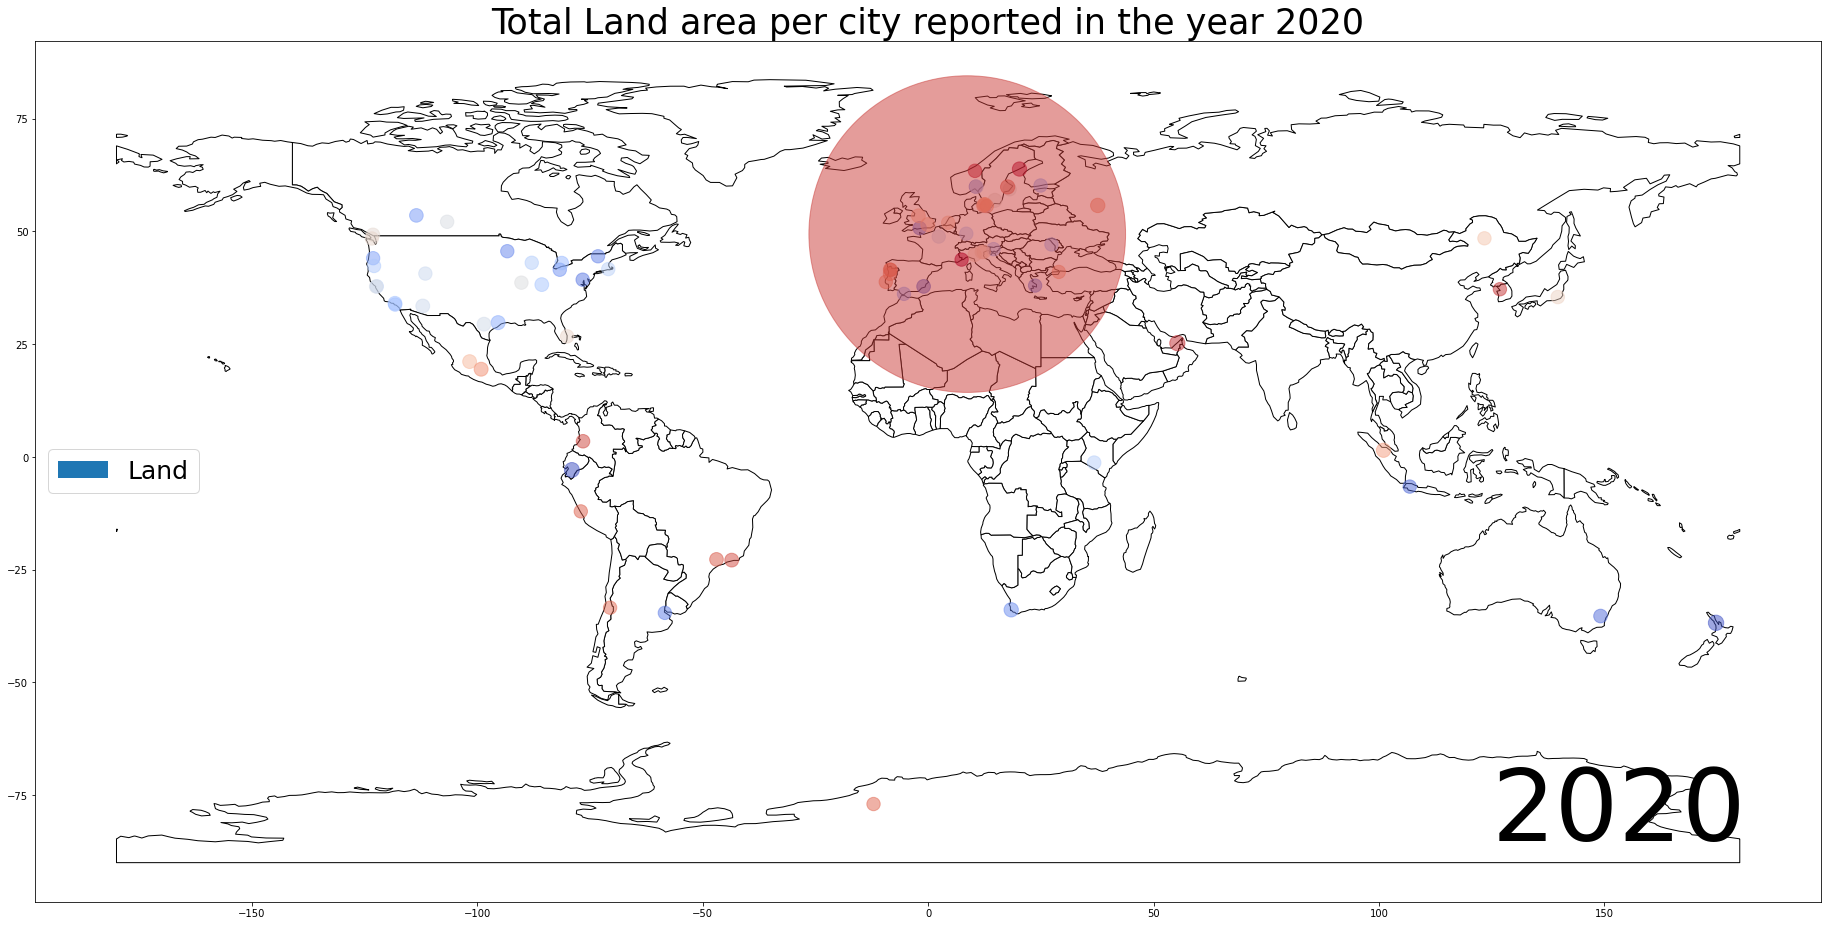

In [ ]:
df_2020 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2020", header=0, skipfooter=7)

df_2020['EMM'] = 0.0
for index,row in df_2020.iterrows():
    total = row['Direct emissions (metric tonnes CO2e) for Total generation of grid-supplied energy'] + \
            row['Direct emissions (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy)']
    df_2020['EMM'][index] = total

    if pd.isna(row['Accounting year'])==False:
      acyear = row['Accounting year']
      year = acyear[:4]
      df_2020['Accounting year'][index] = year
df_2020 = df_2020[['City', 'Country', 'CDP Region', 'Accounting year', 'Land area (in square km)', 'Population', 'City Location', 'EMM']]
df_2020 = df_2020.dropna()

df_2020['City Location'] = df_2020['City Location'].apply(wkt.loads)
df_2020_gdf = gpd.GeoDataFrame(df_2020, geometry='City Location')

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

land_norm = sc_land.fit_transform(df_2020['Land area (in square km)'].to_numpy().reshape(-1, 1))
df_2020['Land area (in square km)'] = land_norm
s_exp_land = pd.Series([200*2**n for n in df_2020['Land area (in square km)']])

land_plot = df_2020_gdf.plot(ax=ax, markersize=s_exp_land, cmap='coolwarm', label='Land', marker='o', alpha=0.5) #cmap='coolwarm' 
land_patch = mpatches.Patch(label='Land')

plt.text(125, -85, '2020', fontsize=100)
plt.title('Total Land area per city reported in the year 2020', fontdict = {'fontsize' : 35})
plt.legend(handles=[land_patch], prop={'size': 25}, loc = 6)
plt.savefig('land_2020.jpg', format='jpg', dpi=400)
plt.show()

# 2019

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


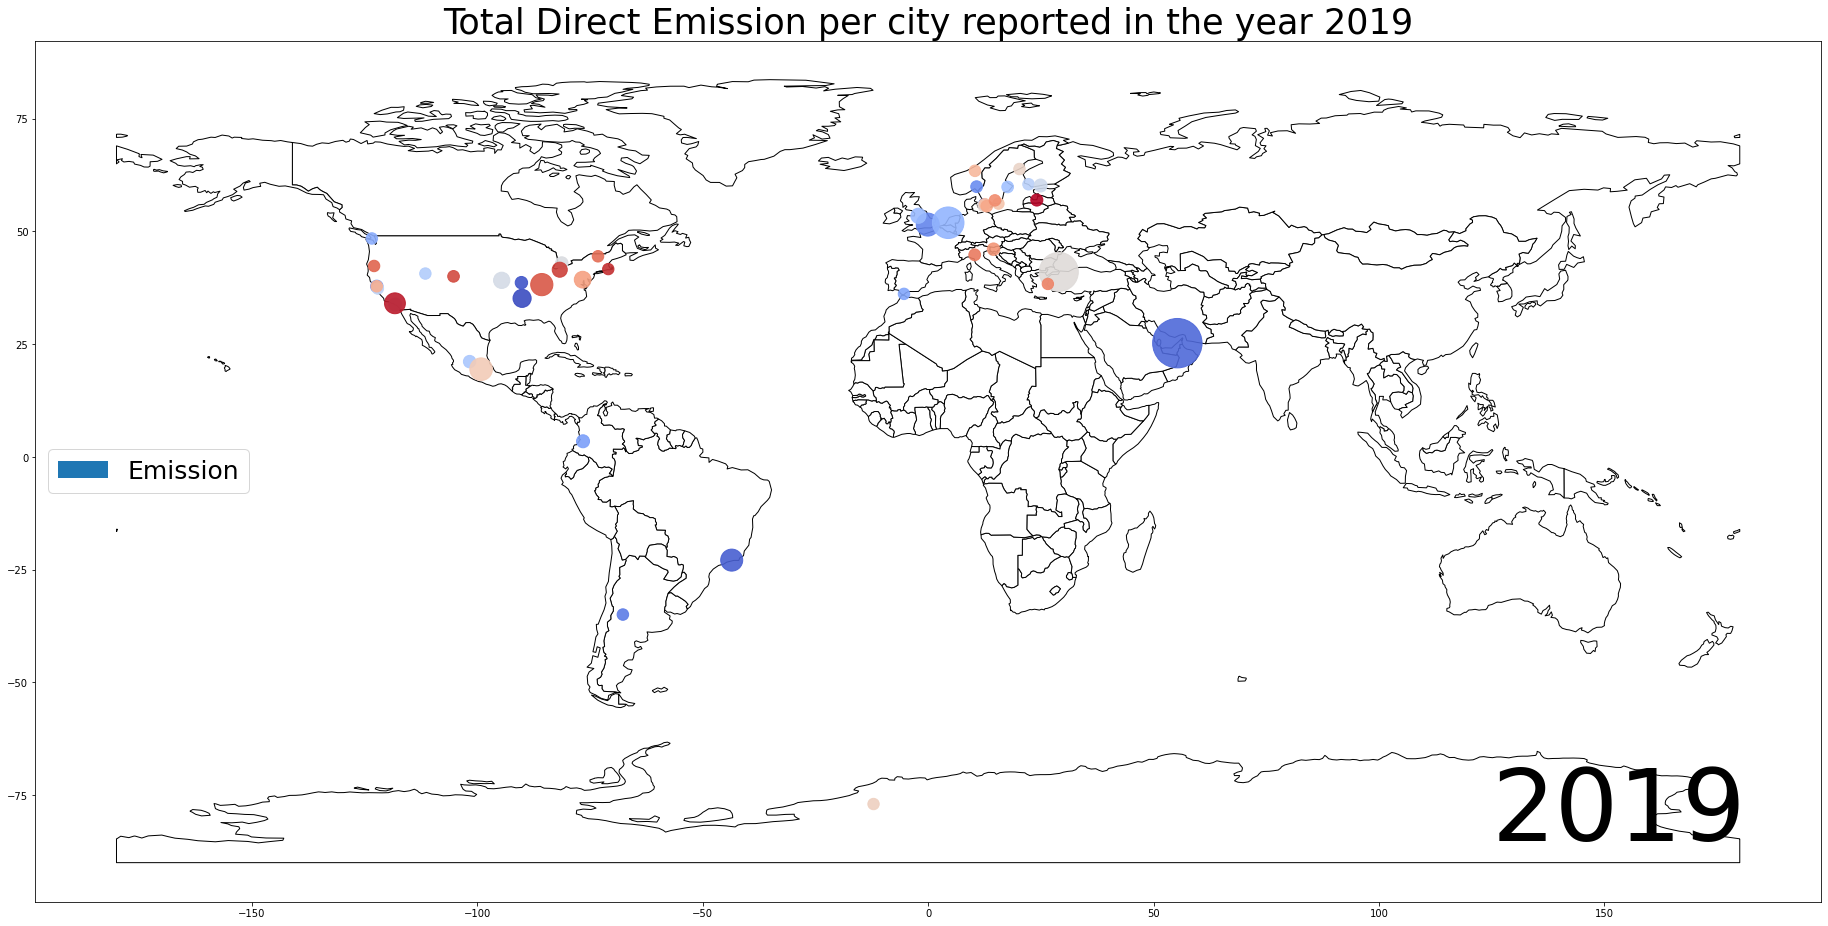

In [ ]:
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

df_2019 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2019", header=0, skipfooter=7)

df_2019.rename(columns={df_2019.columns[15]: "D_Emm_1", df_2019.columns[16]: "D_Emm_2"}, inplace=True)
df_2019['TOTAL'] = 0.0
for index,row in df_2019.iterrows():
    total = row['D_Emm_1'] + row['D_Emm_2']
    # print(total)
    df_2019['TOTAL'][index] = total

    if pd.isna(row['Accounting Year'])==False:
      acYear = row['Accounting Year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2019['Accounting Year'][index] = Year

df_2019 = df_2019[['City', 'City Location', 'Population', 'TOTAL']]
df_2019 = df_2019.dropna()

df_2019['City Location'] = df_2019['City Location'].apply(wkt.loads)
df_2019_gdf = gpd.GeoDataFrame(df_2019, geometry='City Location')

emm_norm = sc_emission.fit_transform(df_2019['TOTAL'].to_numpy().reshape(-1, 1))
df_2019['EMM_NORM'] = emm_norm
s_exp_emm = pd.Series([200*2**n for n in df_2019['EMM_NORM']])

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

emm_plot = df_2019_gdf.plot(ax=ax, markersize=s_exp_emm, cmap='coolwarm', label='Emission', marker='o', alpha=0.9) #cmap='coolwarm'
emm_patch = mpatches.Patch(label='Emission')

plt.text(125, -85, '2019', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2019', fontdict = {'fontsize' : 35})
plt.legend(handles=[emm_patch], prop={'size': 25}, loc = 6)
plt.savefig('emission_2019.jpg', format='jpg', dpi=400)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


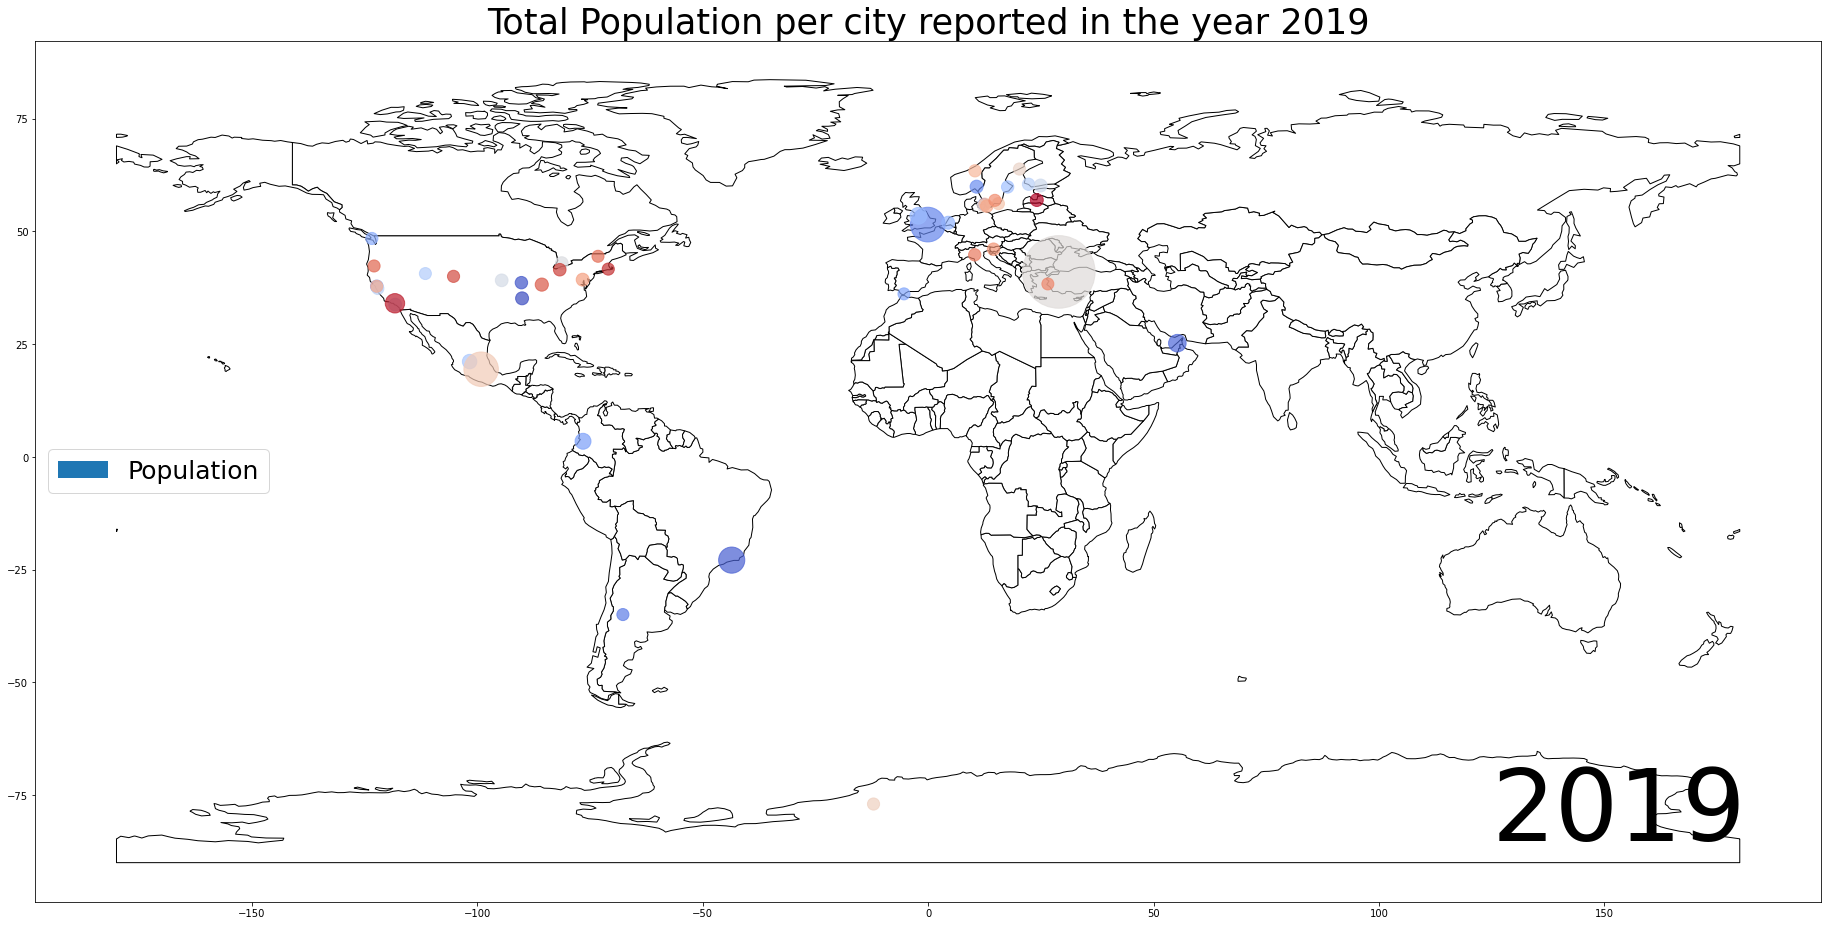

In [ ]:
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

df_2019 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2019", header=0, skipfooter=7)

df_2019.rename(columns={df_2019.columns[15]: "D_Emm_1", df_2019.columns[16]: "D_Emm_2"}, inplace=True)
df_2019['TOTAL'] = 0.0
for index,row in df_2019.iterrows():
    total = row['D_Emm_1'] + row['D_Emm_2']
    # print(total)
    df_2019['TOTAL'][index] = total

    if pd.isna(row['Accounting Year'])==False:
      acYear = row['Accounting Year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2019['Accounting Year'][index] = Year

df_2019 = df_2019[['City', 'City Location', 'Population', 'TOTAL']]
df_2019 = df_2019.dropna()

df_2019['City Location'] = df_2019['City Location'].apply(wkt.loads)
df_2019_gdf = gpd.GeoDataFrame(df_2019, geometry='City Location')

population_norm = sc_population.fit_transform(df_2019['Population'].to_numpy().reshape(-1,1))
df_2019['Population'] = population_norm
s_exp_pop = pd.Series([200*2**n for n in df_2019['Population']])

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

pop_plot = df_2019_gdf.plot(ax=ax, markersize=s_exp_pop, cmap='coolwarm', label='Population', marker='o', alpha=0.7) #cmap='coolwarm'
pop_patch = mpatches.Patch(label='Population')

plt.text(125, -85, '2019', fontsize=100)
plt.title('Total Population per city reported in the year 2019', fontdict = {'fontsize' : 35})
plt.legend(handles=[pop_patch], prop={'size': 25}, loc = 6)
plt.savefig('population_2019.jpg', format='jpg', dpi=400)
plt.show()

# 2018

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


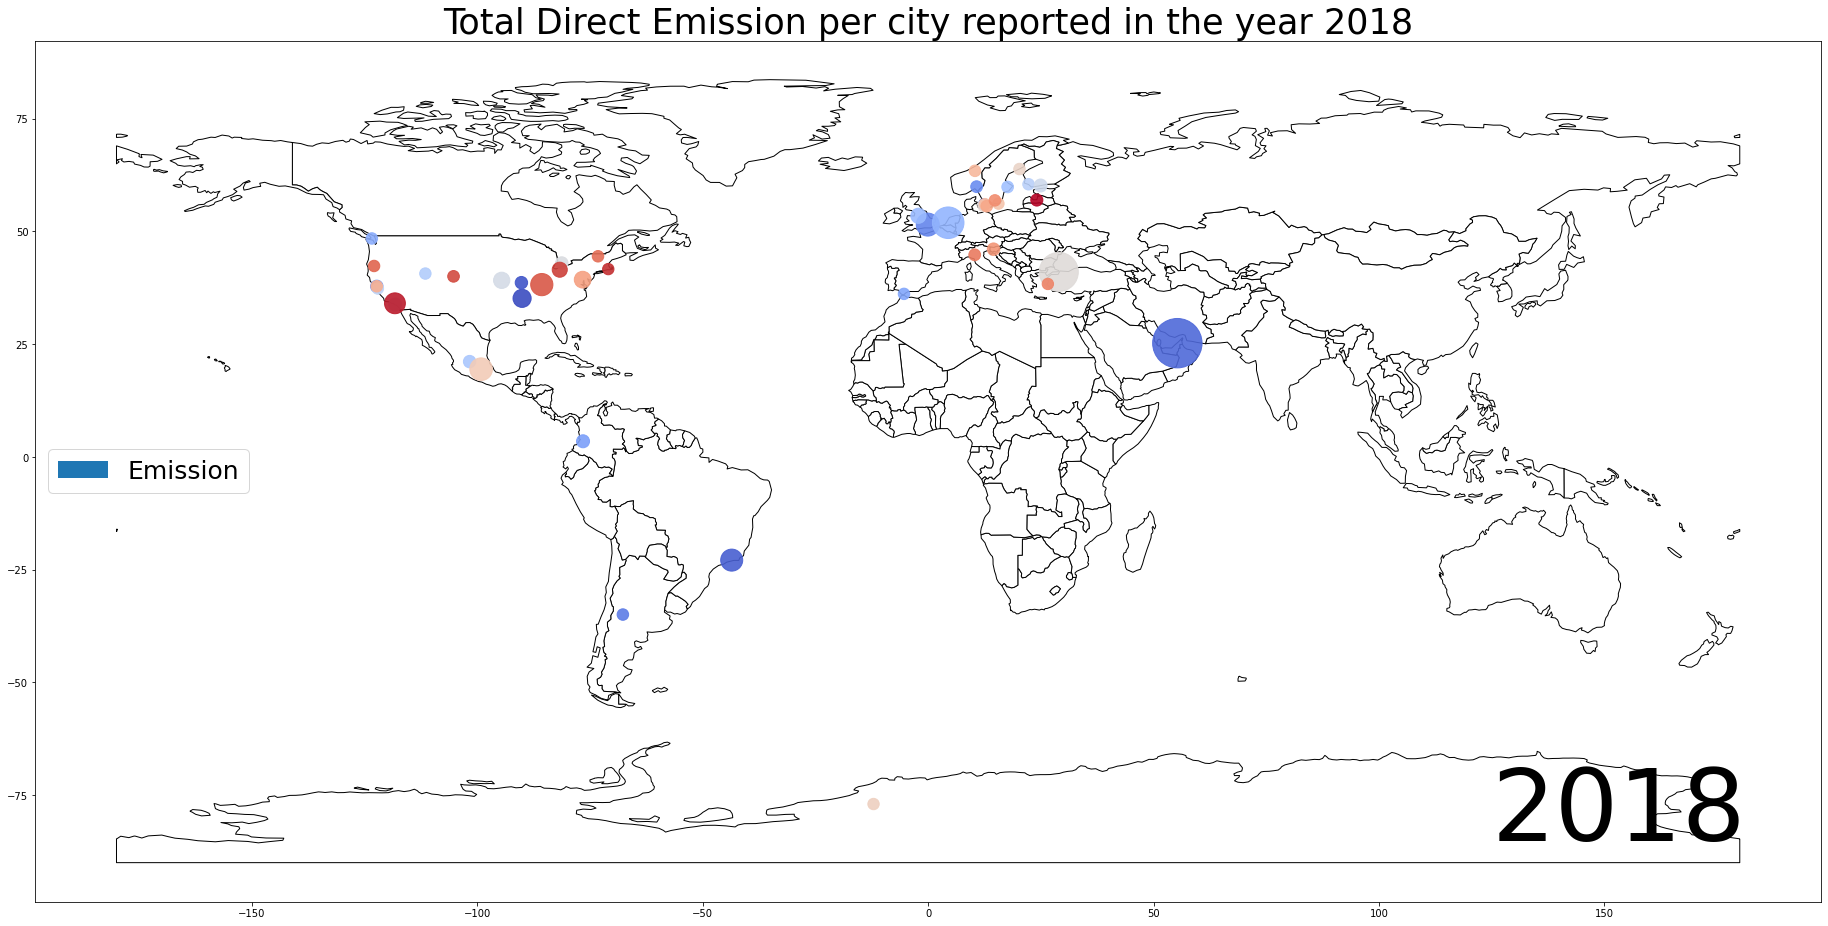

In [ ]:
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

df_2018 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2018", header=0, skipfooter=7)

df_2018.rename(columns={df_2018.columns[15]: "D_Emm_1", df_2018.columns[16]: "D_Emm_2"}, inplace=True)
df_2018['TOTAL'] = 0.0
for index,row in df_2018.iterrows():
    total = row['D_Emm_1'] + row['D_Emm_2']
    df_2018['TOTAL'][index] = total

    if pd.isna(row['Accounting Year'])==False:
      acYear = row['Accounting Year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2018['Accounting Year'][index] = Year

df_2018 = df_2018[['City', 'Country', 'CDP Region', 'Accounting Year', 'Population', 'City Location', 'TOTAL']]
df_2018 = df_2018.dropna()

df_2018['City Location'] = df_2018['City Location'].apply(wkt.loads)
df_2018_gdf = gpd.GeoDataFrame(df_2018, geometry='City Location')

emm_norm = sc_emission.fit_transform(df_2018['TOTAL'].to_numpy().reshape(-1, 1))
df_2018['EMM_NORM'] = emm_norm
s_exp_emm = pd.Series([200*2**n for n in df_2018['EMM_NORM']])

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

emm_plot = df_2018_gdf.plot(ax=ax, markersize=s_exp_emm, cmap='coolwarm', label='Emission', marker='o', alpha=0.9) #cmap='coolwarm'
emm_patch = mpatches.Patch(label='Emission')

plt.text(125, -85, '2018', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2018', fontdict = {'fontsize' : 35})
plt.legend(handles=[emm_patch], prop={'size': 25}, loc = 6)
plt.savefig('emission_2018.jpg', format='jpg', dpi=400)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


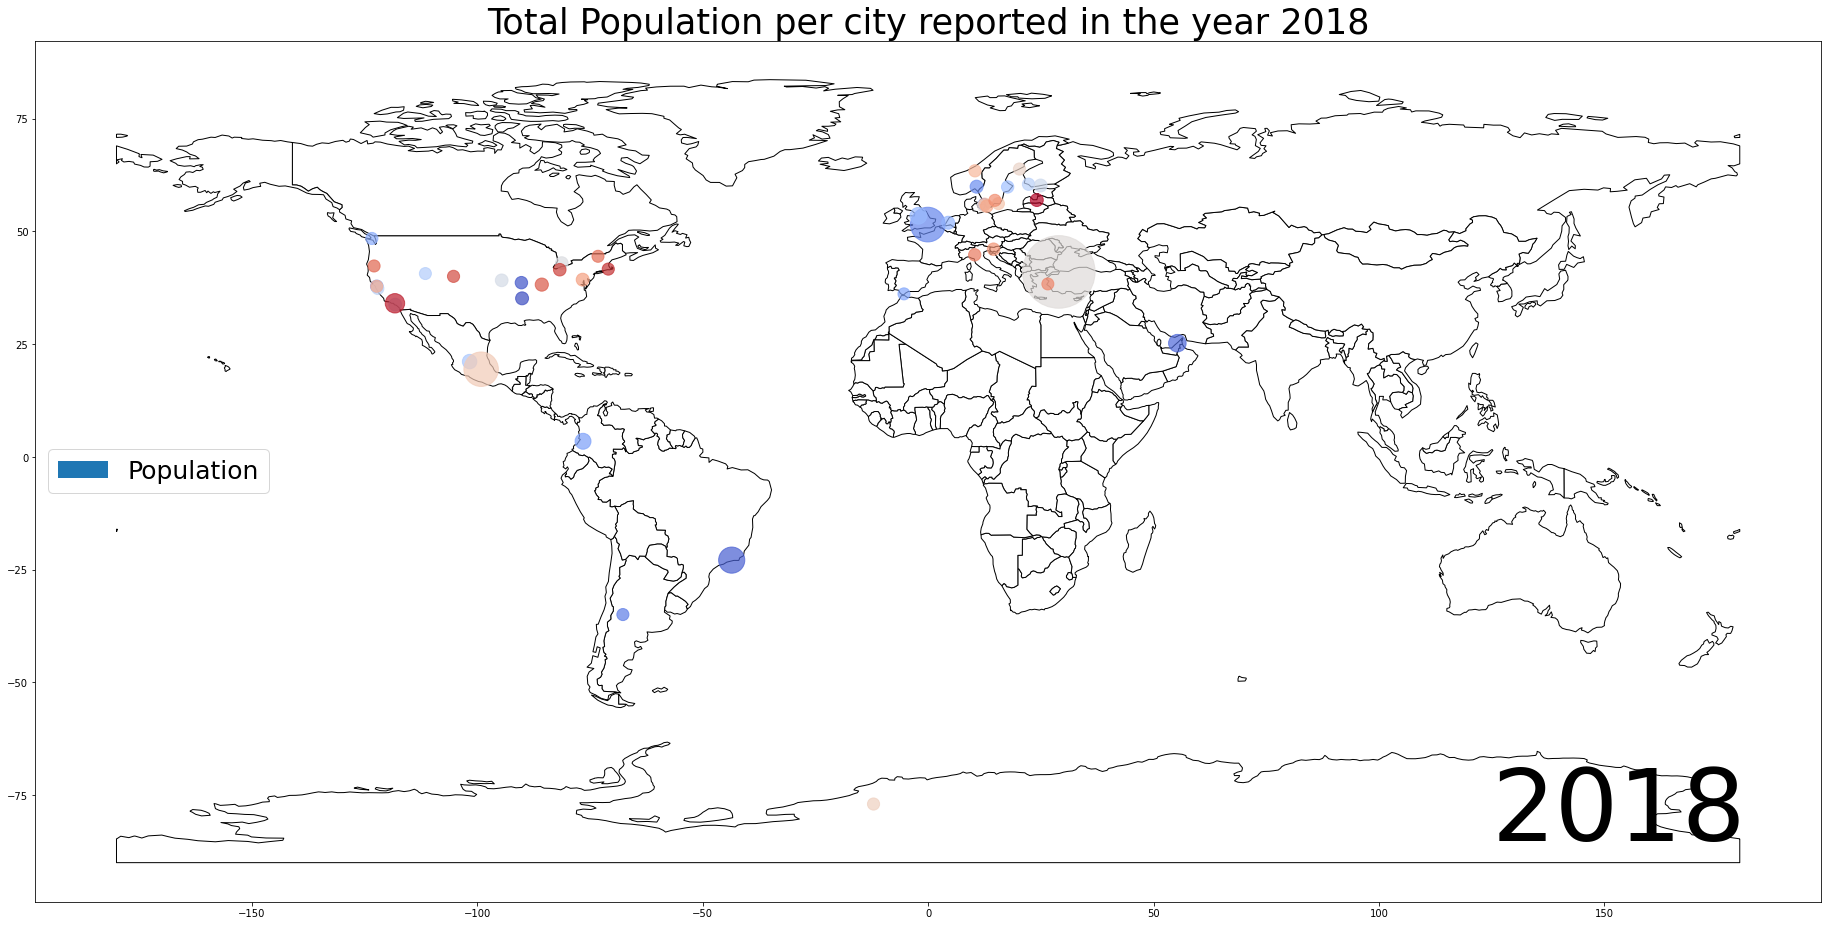

In [ ]:
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

df_2018 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2018", header=0, skipfooter=7)

df_2018.rename(columns={df_2018.columns[15]: "D_Emm_1", df_2018.columns[16]: "D_Emm_2"}, inplace=True)
df_2018['TOTAL'] = 0.0
for index,row in df_2018.iterrows():
    total = row['D_Emm_1'] + row['D_Emm_2']
    df_2018['TOTAL'][index] = total

    if pd.isna(row['Accounting Year'])==False:
      acYear = row['Accounting Year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2018['Accounting Year'][index] = Year

df_2018 = df_2018[['City', 'Country', 'CDP Region', 'Accounting Year', 'Population', 'City Location', 'TOTAL']]
df_2018 = df_2018.dropna()

df_2018['City Location'] = df_2018['City Location'].apply(wkt.loads)
df_2018_gdf = gpd.GeoDataFrame(df_2018, geometry='City Location')

population_norm = sc_population.fit_transform(df_2018['Population'].to_numpy().reshape(-1,1))
df_2018['Population'] = population_norm
s_exp_pop = pd.Series([200*2**n for n in df_2018['Population']])

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

pop_plot = df_2018_gdf.plot(ax=ax, markersize=s_exp_pop, cmap='coolwarm', label='Population', marker='o', alpha=0.7) #cmap='coolwarm'
pop_patch = mpatches.Patch(label='Population')

plt.text(125, -85, '2018', fontsize=100)
plt.title('Total Population per city reported in the year 2018', fontdict = {'fontsize' : 35})
plt.legend(handles=[pop_patch], prop={'size': 25}, loc = 6)
plt.savefig('population_2018.jpg', format='jpg', dpi=400)
plt.show()

# 2017

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


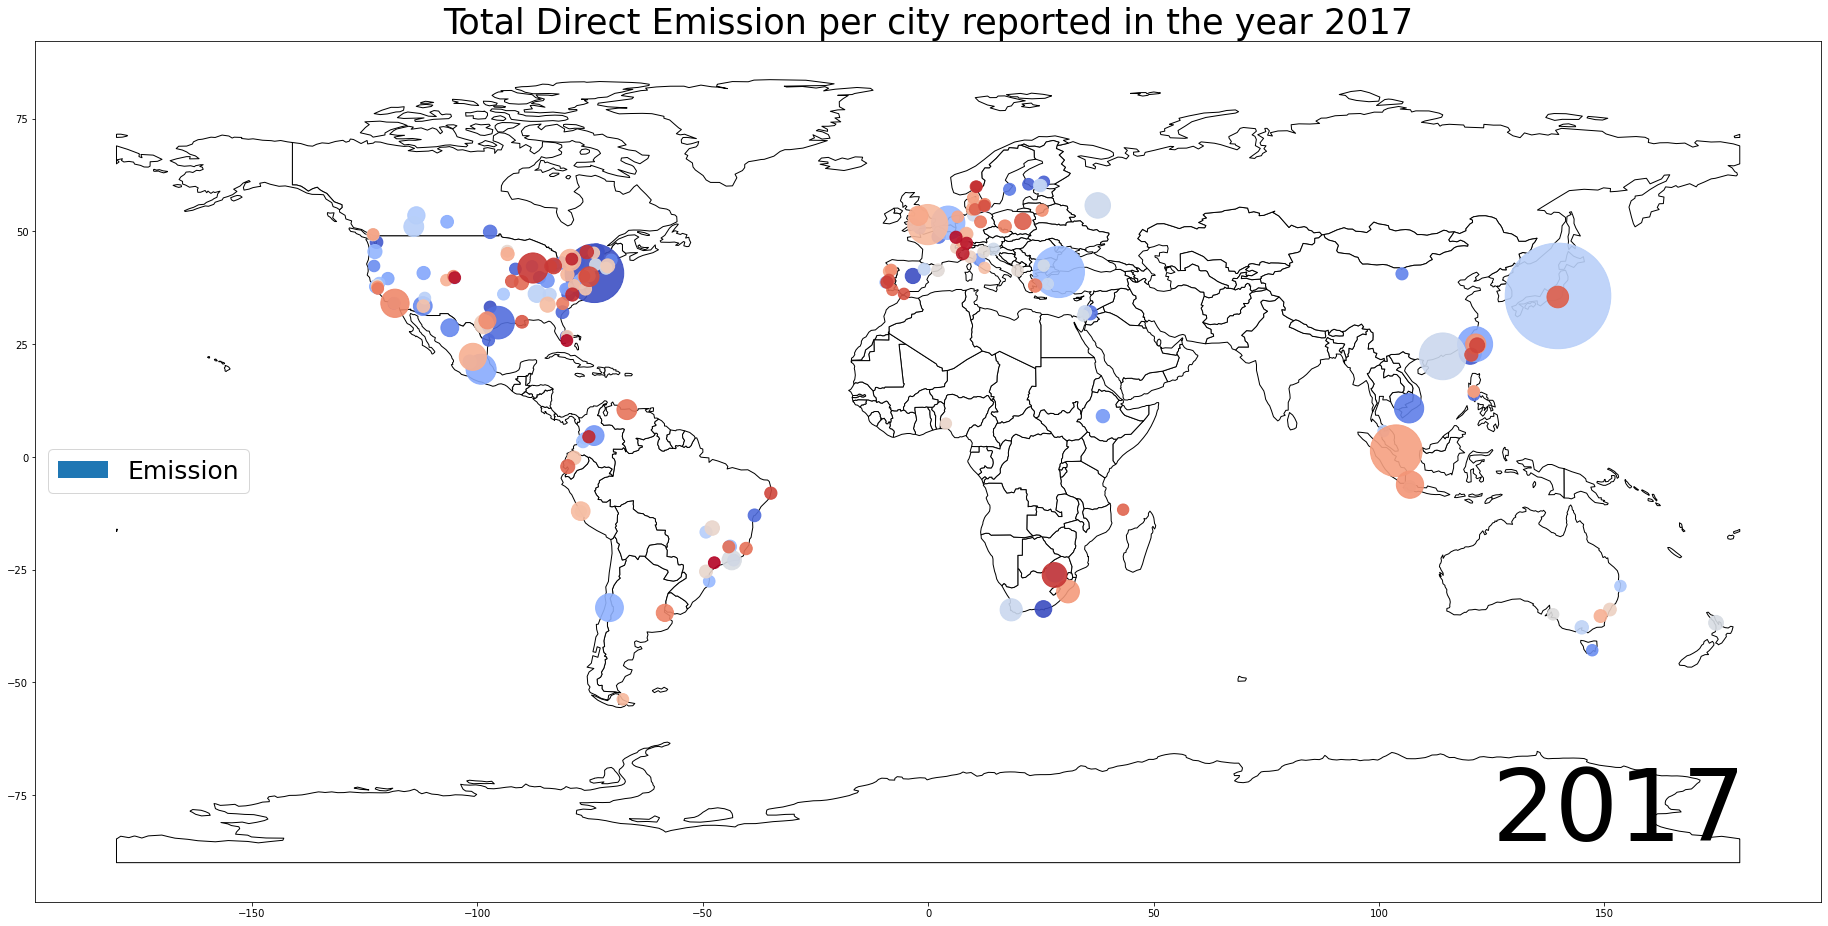

In [ ]:
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

df_2017 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2017", header=0, skipfooter=7)

df_2017['Longitude'] = 0.0
df_2017['Latitude'] = 0.0
for index,row in df_2017.iterrows():
    start = row['City Location'].find('(')
    end = row['City Location'].find(')')
    loc = row['City Location'][start+1:end]
    lng, lat = loc.split()
    df_2017['Latitude'][index] = lng[:-1]
    df_2017['Longitude'][index] = lat

    if pd.isna(row['Accounting year'])==False:
      acYear = row['Accounting year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2017['Accounting year'][index] = Year

df_2017 = df_2017[['City', 'Country', 'Region', 'Total emissions (metric tonnes CO2e)', 'Population', 'â€‹Land area (in square km)', 'Longitude', 'Latitude']]
df_2017 = df_2017.dropna()

df_2017_gdf = gpd.GeoDataFrame(
    df_2017, geometry=gpd.points_from_xy(df_2017['Longitude'], df_2017['Latitude']))

emm_norm = sc_emission.fit_transform(df_2017['Total emissions (metric tonnes CO2e)'].to_numpy().reshape(-1, 1))
df_2017['EMM_NORM'] = emm_norm
s_exp_emm = pd.Series([200*2**n for n in df_2017['EMM_NORM']])

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

emm_plot = df_2017_gdf.plot(ax=ax, markersize=s_exp_emm, cmap='coolwarm', label='Emission', marker='o', alpha=0.9) #cmap='coolwarm'
emm_patch = mpatches.Patch(label='Emission')

plt.text(125, -85, '2017', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2017', fontdict = {'fontsize' : 35})
plt.legend(handles=[emm_patch], prop={'size': 25}, loc = 6)
plt.savefig('emm_2017.jpg', format='jpg', dpi=400)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


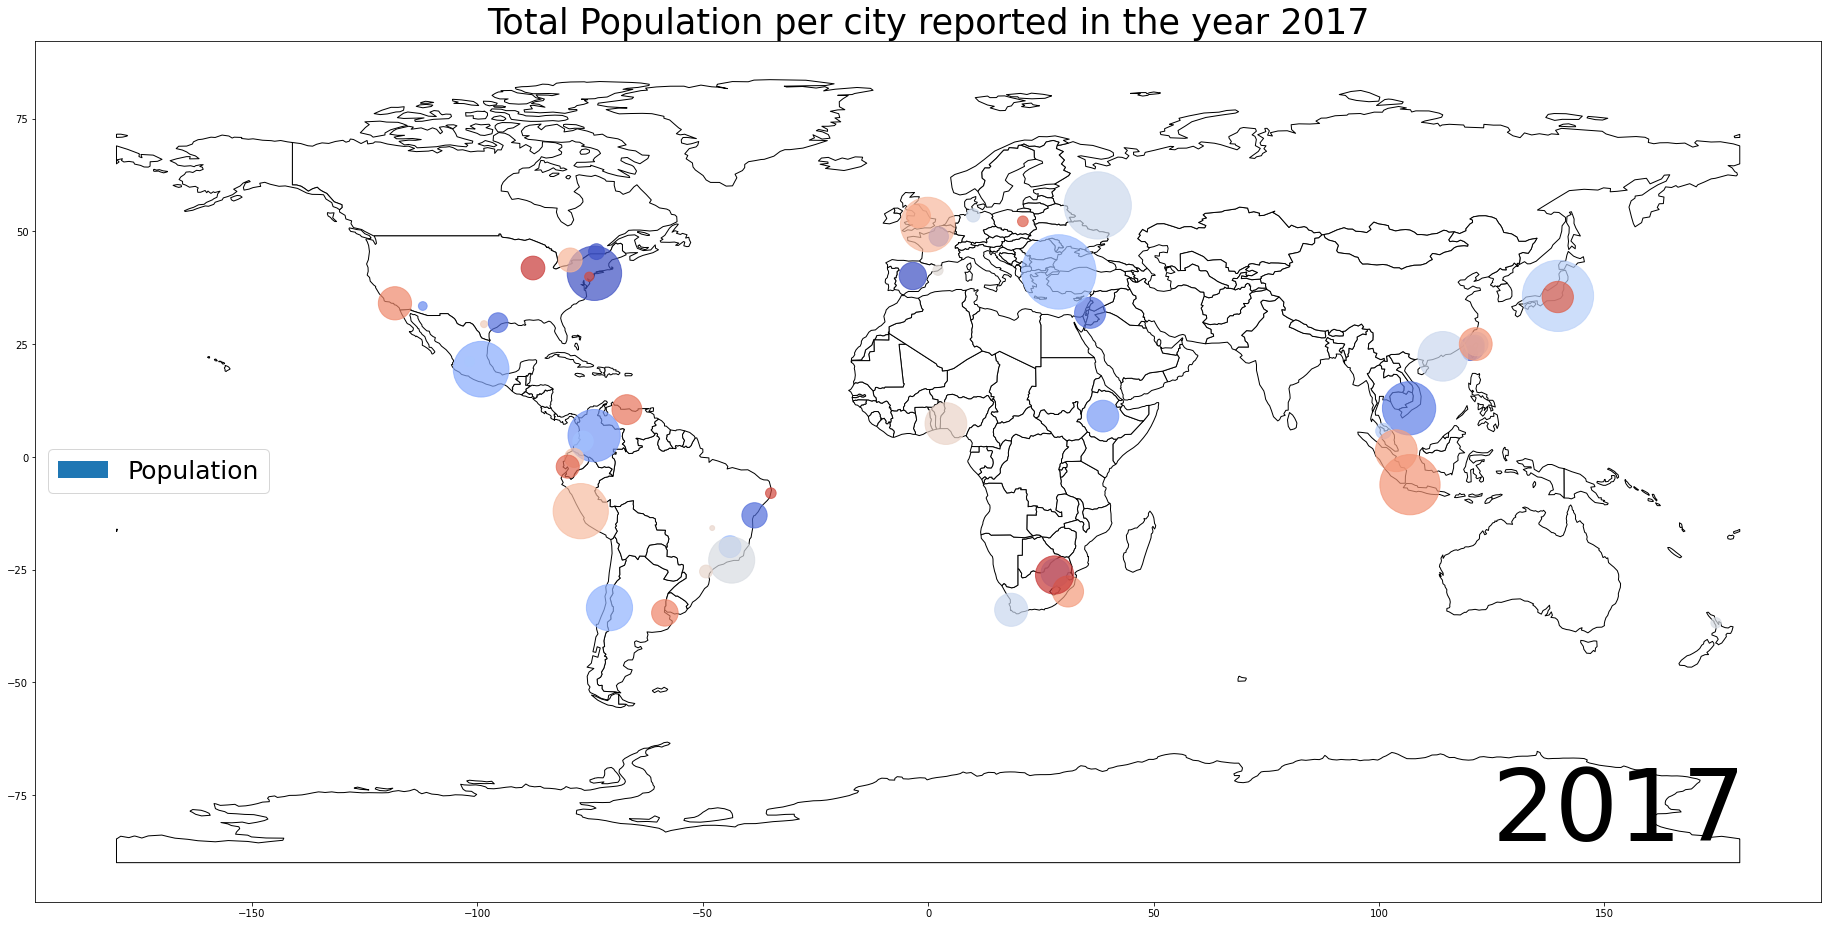

In [ ]:
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

df_2017 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2017", header=0, skipfooter=7)

df_2017['Longitude'] = 0.0
df_2017['Latitude'] = 0.0
for index,row in df_2017.iterrows():
    start = row['City Location'].find('(')
    end = row['City Location'].find(')')
    loc = row['City Location'][start+1:end]
    lng, lat = loc.split()
    df_2017['Latitude'][index] = lng[:-1]
    df_2017['Longitude'][index] = lat

    if pd.isna(row['Accounting year'])==False:
      acYear = row['Accounting year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2017['Accounting year'][index] = Year

df_2017 = df_2017[['City', 'Country', 'Region', 'Total emissions (metric tonnes CO2e)', 'Population', 'â€‹Land area (in square km)', 'Longitude', 'Latitude']]
df_2017 = df_2017.dropna()

df_2017_gdf = gpd.GeoDataFrame(
    df_2017, geometry=gpd.points_from_xy(df_2017['Longitude'], df_2017['Latitude']))

population_norm = sc_population.fit_transform(df_2017['Population'].to_numpy().reshape(-1,1))
df_2017['Population'] = population_norm
s_exp_pop = pd.Series([1000*n for n in df_2017['Population']])

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

pop_plot = df_2017_gdf.plot(ax=ax, markersize=s_exp_pop, cmap='coolwarm', label='Population', marker='o', alpha=0.7) #cmap='coolwarm'
pop_patch = mpatches.Patch(label='Population')

plt.text(125, -85, '2017', fontsize=100)
plt.title('Total Population per city reported in the year 2017', fontdict = {'fontsize' : 35})
plt.legend(handles=[pop_patch], prop={'size': 25}, loc = 6)
plt.savefig('pop_2017.jpg', format='jpg', dpi=400)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


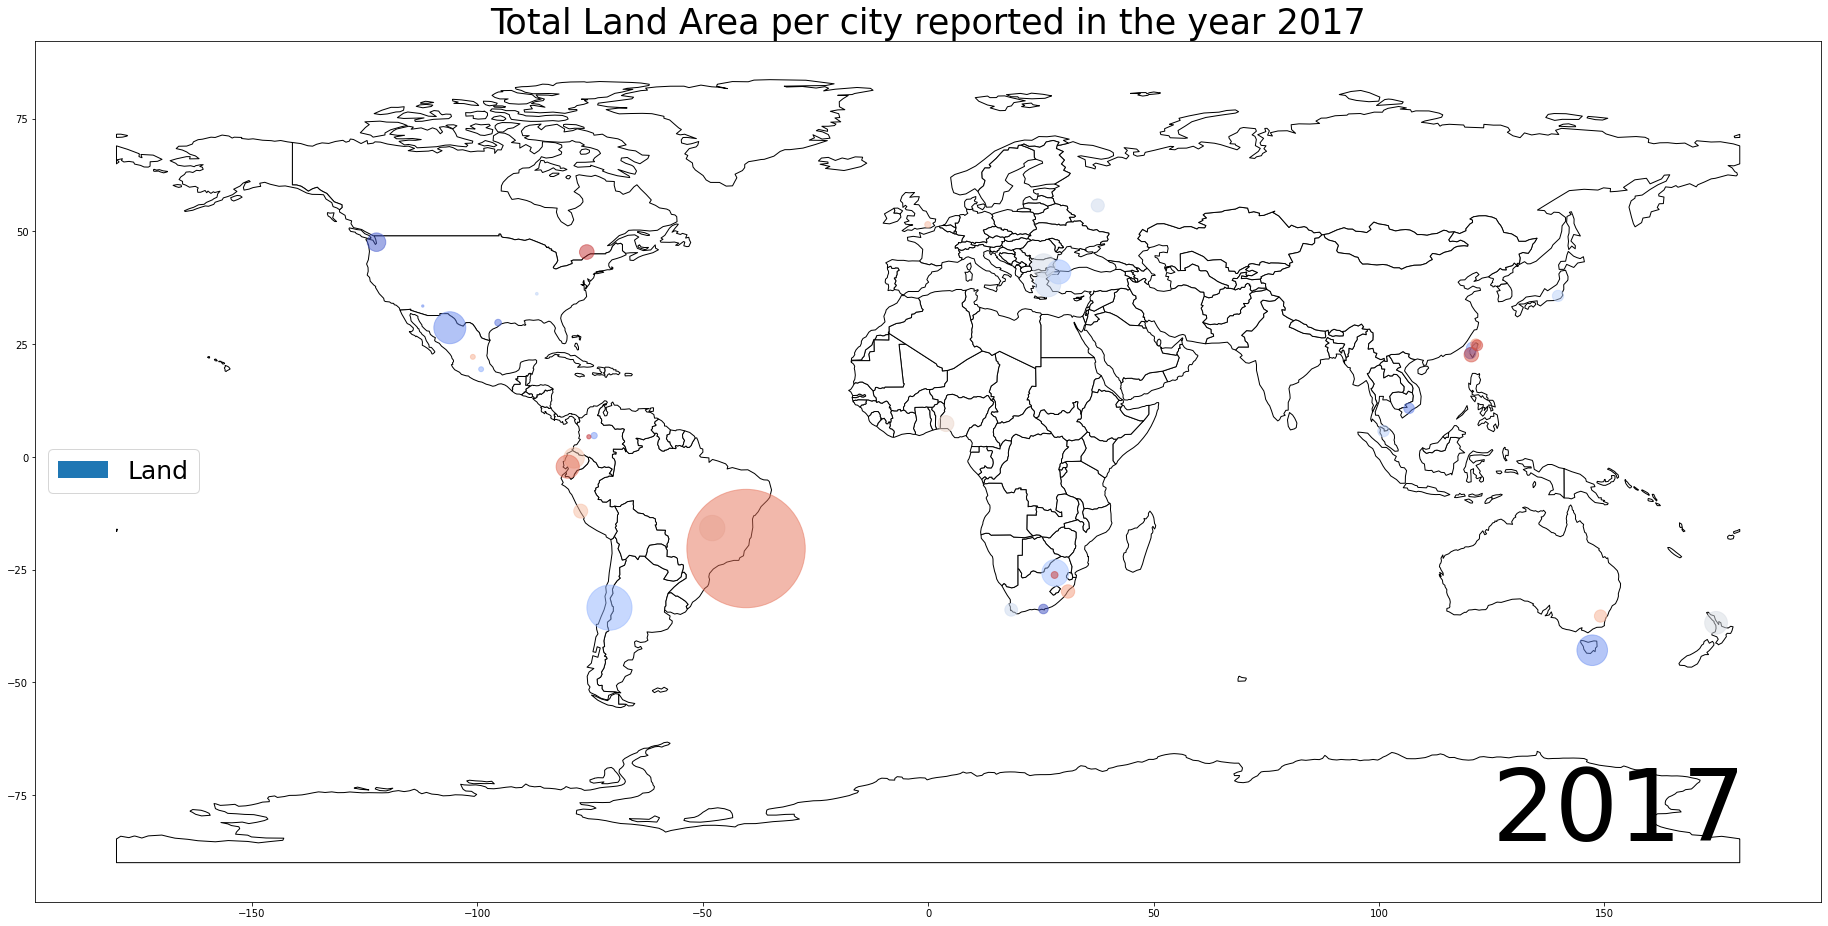

In [ ]:
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

df_2017 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2017", header=0, skipfooter=7)

df_2017['Longitude'] = 0.0
df_2017['Latitude'] = 0.0
for index,row in df_2017.iterrows():
    start = row['City Location'].find('(')
    end = row['City Location'].find(')')
    loc = row['City Location'][start+1:end]
    lng, lat = loc.split()
    df_2017['Latitude'][index] = lng[:-1]
    df_2017['Longitude'][index] = lat

    if pd.isna(row['Accounting year'])==False:
      acYear = row['Accounting year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2017['Accounting year'][index] = Year

df_2017 = df_2017[['City', 'Country', 'Region', 'Total emissions (metric tonnes CO2e)', 'Population', 'â€‹Land area (in square km)', 'Longitude', 'Latitude']]
df_2017 = df_2017.dropna()

df_2017_gdf = gpd.GeoDataFrame(
    df_2017, geometry=gpd.points_from_xy(df_2017['Longitude'], df_2017['Latitude']))

land_norm = sc_land.fit_transform(df_2017['â€‹Land area (in square km)'].to_numpy().reshape(-1, 1))
df_2017['â€‹Land area (in square km)'] = land_norm
s_exp_land = pd.Series([1000*n for n in df_2017['â€‹Land area (in square km)']])

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

land_plot = df_2017_gdf.plot(ax=ax, markersize=s_exp_land, cmap='coolwarm', label='Land', marker='o', alpha=0.5) #cmap='coolwarm' 
land_patch = mpatches.Patch(label='Land')

plt.text(125, -85, '2017', fontsize=100)
plt.title('Total Land Area per city reported in the year 2017', fontdict = {'fontsize' : 35})
plt.legend(handles=[land_patch], prop={'size': 25}, loc = 6)
plt.savefig('land_2017.jpg', format='jpg', dpi=400)
plt.show()

# 2016

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


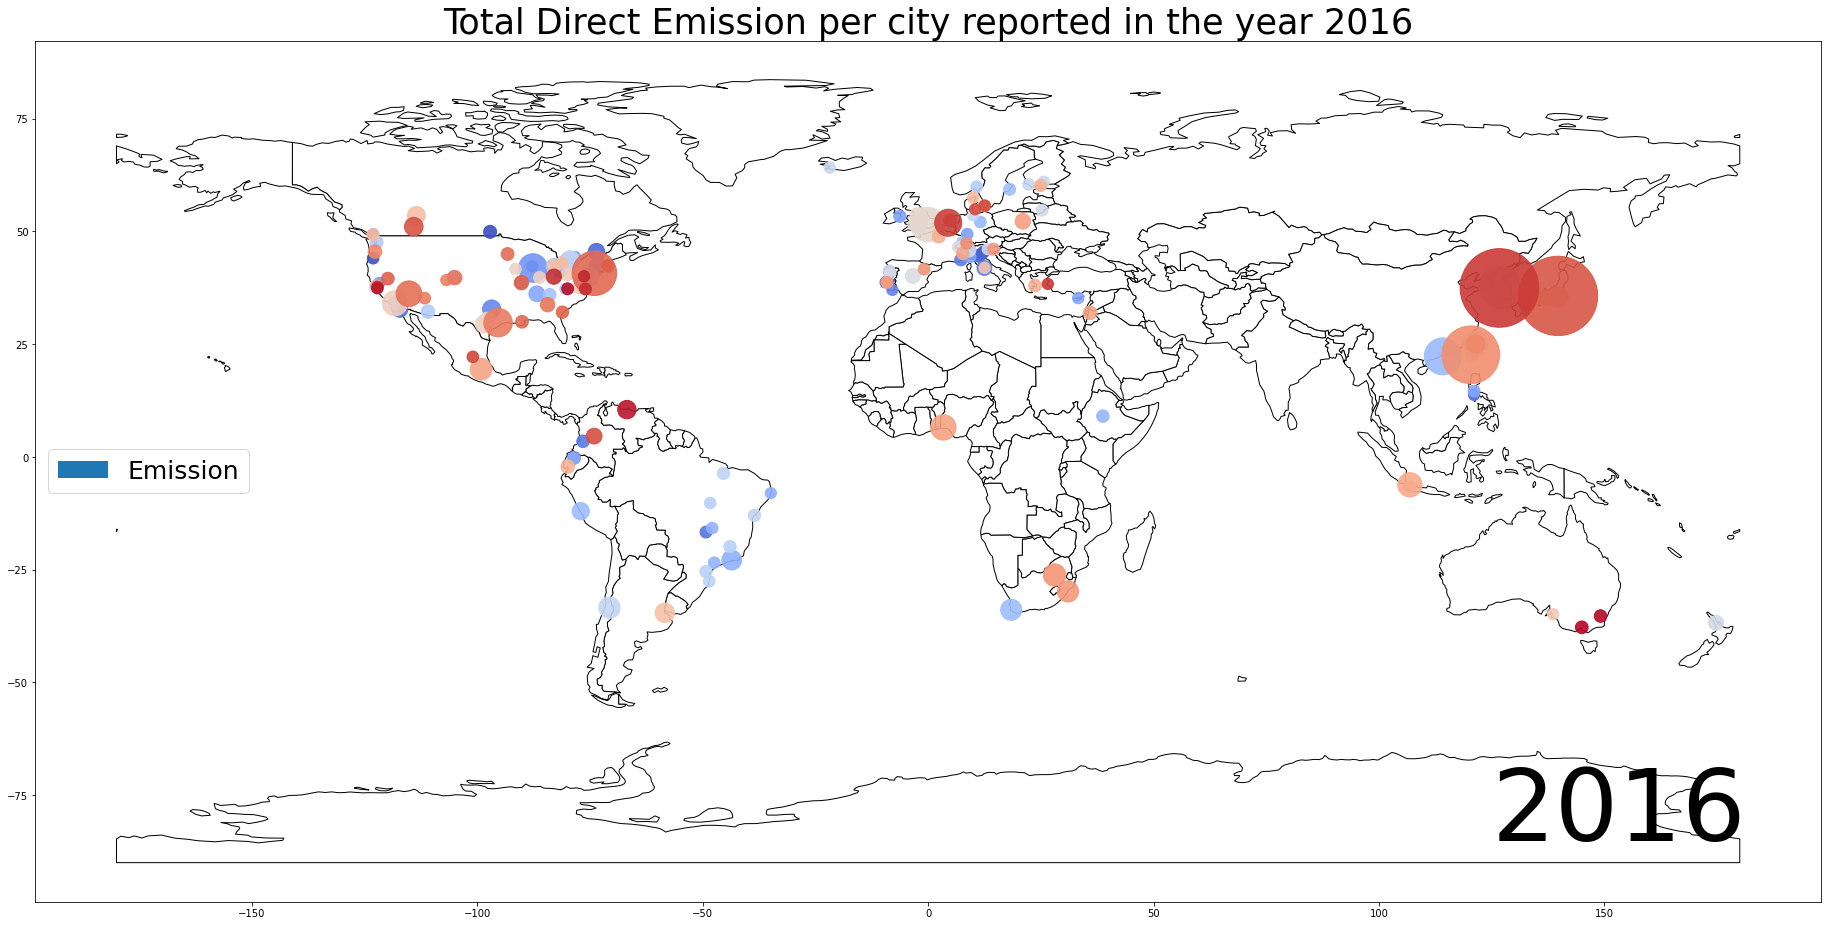

In [ ]:
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

df_2016 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2016", header=0, skipfooter=7)

df_2016['Longitude'] = 0.0
df_2016['Latitude'] = 0.0
for index,row in df_2016.iterrows():
    start = row['City Location'].find('(')
    end = row['City Location'].find(')')
    loc = row['City Location'][start+1:end]
    lng, lat = loc.split()
    df_2016['Latitude'][index] = lng[:-2]
    df_2016['Longitude'][index] = lat[:-1]

    if pd.isna(row['Measurement Year\xa0'])==False:
      acYear = row['Measurement Year\xa0']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2016['Measurement Year\xa0'][index] = Year

df_2016 = df_2016[['City Name\xa0', 'Country\xa0', 'Measurement Year\xa0', 'Total City-wide Emissions (metric tonnes CO2e)\xa0', 'Current Population\xa0', 'Longitude', 'Latitude']]
df_2016 = df_2016.dropna()

df_2016_gdf = gpd.GeoDataFrame(
    df_2016, geometry=gpd.points_from_xy(df_2016['Longitude'], df_2016['Latitude']))

emm_norm = sc_emission.fit_transform(df_2016['Total City-wide Emissions (metric tonnes CO2e)\xa0'].to_numpy().reshape(-1, 1))
df_2016['EMM_NORM'] = emm_norm
s_exp_emm = pd.Series([200*2**n for n in df_2016['EMM_NORM']])

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

emm_plot = df_2016_gdf.plot(ax=ax, markersize=s_exp_emm, cmap='coolwarm', label='Emission', marker='o', alpha=0.9) #cmap='coolwarm'
emm_patch = mpatches.Patch(label='Emission')

plt.text(125, -85, '2016', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2016', fontdict = {'fontsize' : 35})
plt.legend(handles=[emm_patch], prop={'size': 25}, loc = 6)
plt.savefig('emm_2016.jpg', format='jpg', dpi=400)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


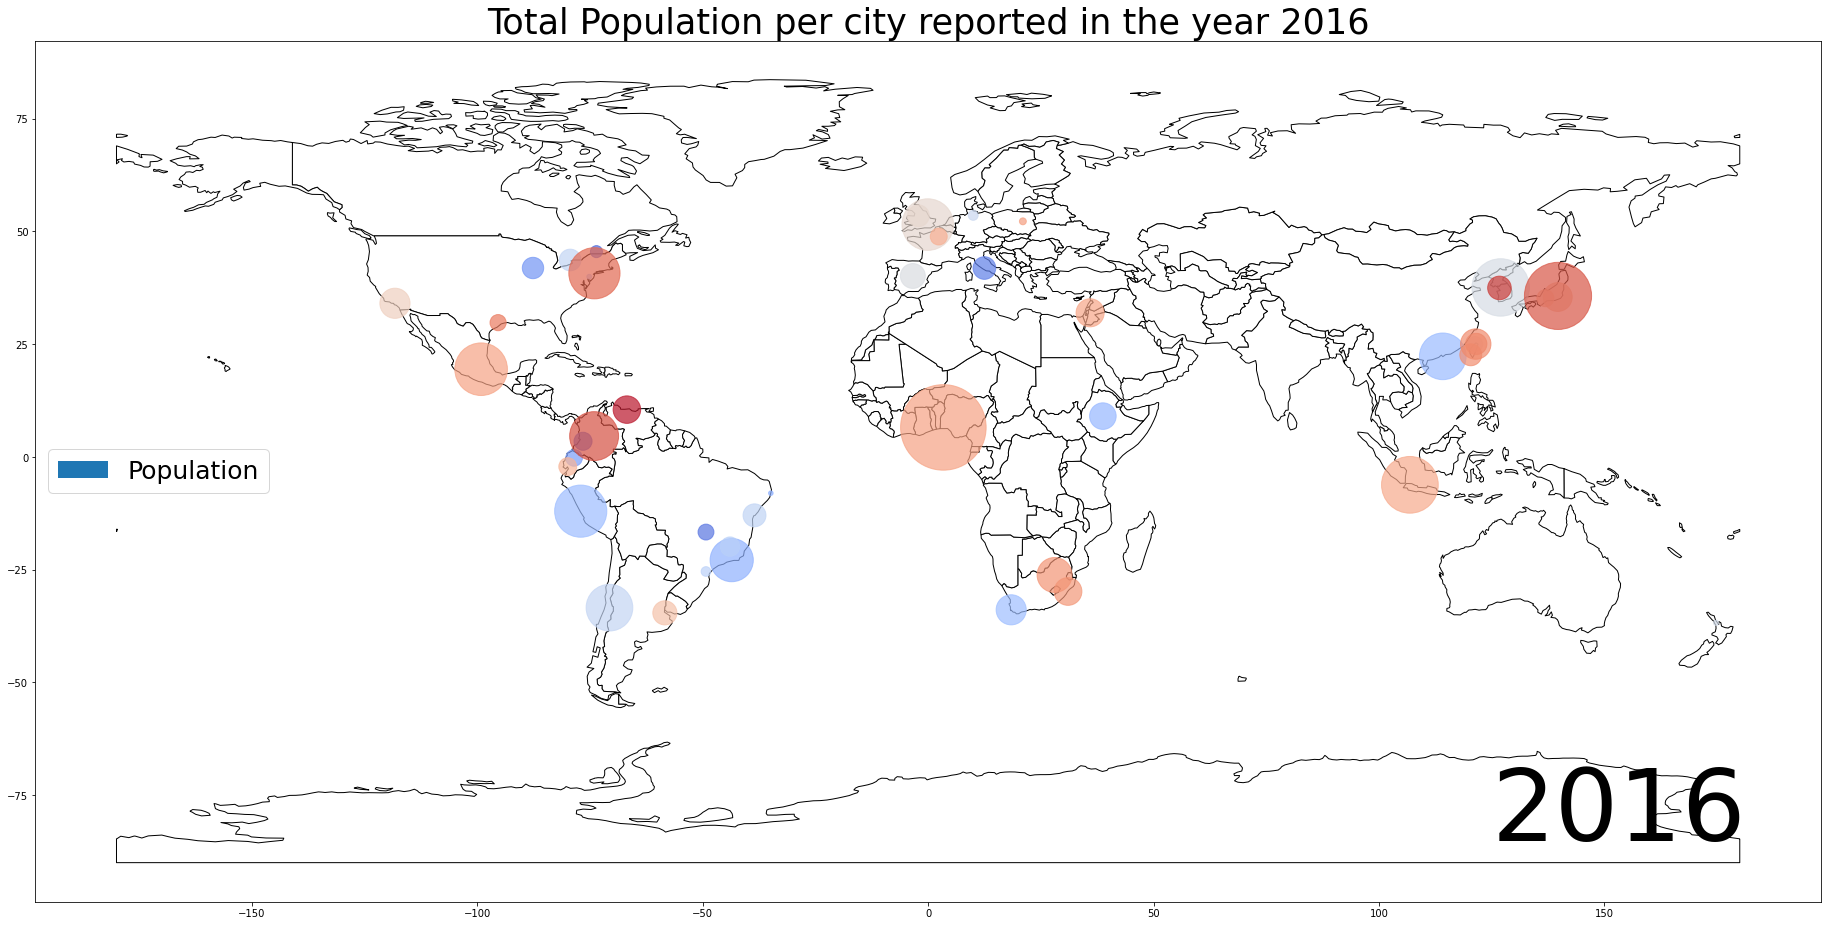

In [ ]:
sc_emission = StandardScaler()
sc_population = StandardScaler()
sc_land = StandardScaler()

df_2016 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2016", header=0, skipfooter=7)

df_2016['Longitude'] = 0.0
df_2016['Latitude'] = 0.0
for index,row in df_2016.iterrows():
    start = row['City Location'].find('(')
    end = row['City Location'].find(')')
    loc = row['City Location'][start+1:end]
    lng, lat = loc.split()
    df_2016['Latitude'][index] = lng[:-2]
    df_2016['Longitude'][index] = lat[:-1]

    if pd.isna(row['Measurement Year\xa0'])==False:
      acYear = row['Measurement Year\xa0']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2016['Measurement Year\xa0'][index] = Year

df_2016 = df_2016[['City Name\xa0', 'Country\xa0', 'Measurement Year\xa0', 'Total City-wide Emissions (metric tonnes CO2e)\xa0', 'Current Population\xa0', 'Longitude', 'Latitude']]
df_2016 = df_2016.dropna()

df_2016_gdf = gpd.GeoDataFrame(
    df_2016, geometry=gpd.points_from_xy(df_2016['Longitude'], df_2016['Latitude']))

population_norm = sc_population.fit_transform(df_2016['Current Population\xa0'].to_numpy().reshape(-1,1))
df_2016['Population'] = population_norm
s_exp_pop = pd.Series([1000*n for n in df_2016['Population']])

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

pop_plot = df_2016_gdf.plot(ax=ax, markersize=s_exp_pop, cmap='coolwarm', label='Population', marker='o', alpha=0.7) #cmap='coolwarm'
pop_patch = mpatches.Patch(label='Population')

plt.text(125, -85, '2016', fontsize=100)
plt.title('Total Population per city reported in the year 2016', fontdict = {'fontsize' : 35})
plt.legend(handles=[pop_patch], prop={'size': 25}, loc = 6)
plt.savefig('pop_2016.jpg', format='jpg', dpi=400)
plt.show()